In [11]:
import pandas as pd

nombres = ['Elevation', 'Aspect', 'Slope', 'H_d_H', 'V_d_H', 'H_d_R', 'H_9am', 'H_Noon',
            'H_3pm', 'H_d_F']+[f'w_A_{i+1}' for i in range(4)]+[f'S_T_{i+1}' for i in range(40)]+["Cover_Type"]
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz", names=nombres, header=None)

data.head()

,Elevation,Aspect,Slope,H_d_H,V_d_H,H_d_R,H_9am,H_Noon,H_3pm,H_d_F,...,S_T_32,S_T_33,S_T_34,S_T_35,S_T_36,S_T_37,S_T_38,S_T_39,S_T_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [12]:
#X e y
X = data.drop("Cover_Type", axis=1) #Matriz de entrada original
y = data["Cover_Type"] #Vector de salida y

In [13]:
from sklearn.preprocessing import StandardScaler

sl = StandardScaler()
X_scalado = sl.fit_transform(X)

In [38]:
#Calcular la matriz de covarianzas
import numpy as np
mat_cov = np.cov(X, rowvar=False)
#Calcular nuestros autovalores y autovectores
autoval, autovec = np.linalg.eig(mat_cov)
#Ordenar autovalores y autovectores
indice_ord = np.argsort(autoval)[::-1]
autovalores_ord = autoval[indice_ord]
autovectores_ord = autovec[:,indice_ord]
#Varianza acumulada
varianza_acum = np.cumsum(autovalores_ord)/np.sum(autovalores_ord)
num_componentes = np.argmax(varianza_acum>=0.95)+1
autovectores_sel = autovectores_ord[:,:num_componentes]
#Transformar nuestros datos a la nueva dirección según los autovectores ordenados seleccionados
X_pca = np.dot(X, autovectores_sel)



In [42]:
#Generación de un modelo de clasificación

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#División de conjunto de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X_pca,y, test_size=0.3, random_state=42)

modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X)
exactitud = accuracy_score(y_test, y_pred)
print(f"La exactitud del modelo con PCA = 2 es: {exactitud}")


KeyboardInterrupt: 

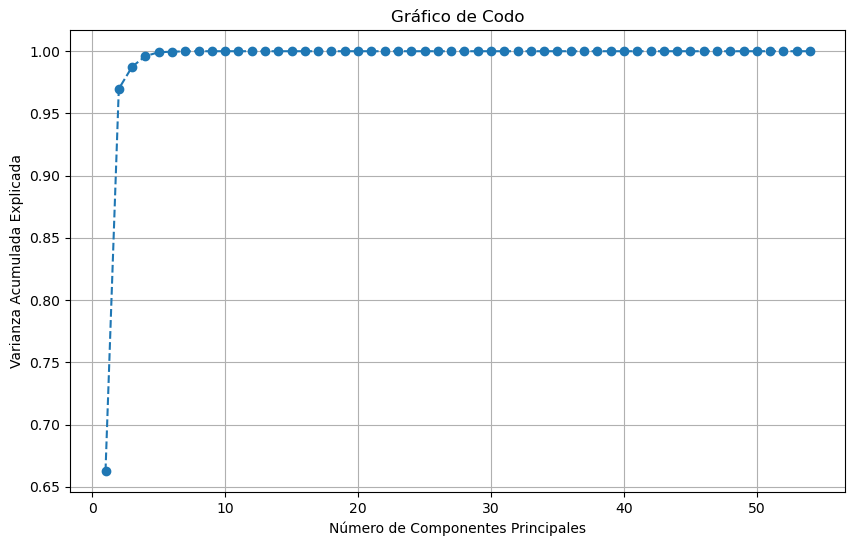

Número de Componentes Principales para explicar el 95% de la varianza: 2


In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
margen_x = range(1, len(varianza_acum)+1)
plt.plot(margen_x, varianza_acum, marker="o", linestyle="--")
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Acumulada Explicada")
plt.title("Gráfico de Codo")
plt.grid()
plt.show()
print(f"Número de Componentes Principales para explicar el 95% de la varianza: {num_componentes}")

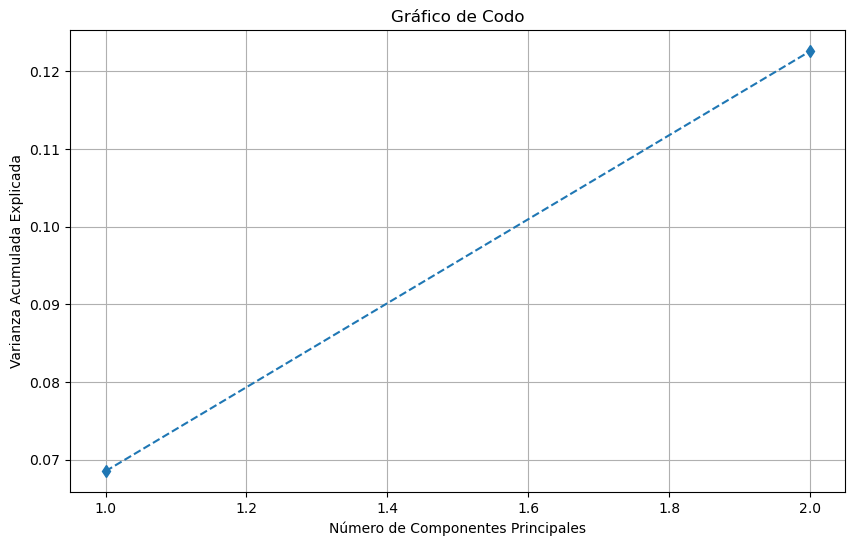

Número de Componentes Principales para explicar el 95% de la varianza: 1


In [43]:
#Usando la librería de Sklearn
from sklearn.decomposition import PCA

#Con los valores escalados
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scalado)
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)
n_componentes = np.argmax(varianza_acumulada>=0.95)+1
plt.figure(figsize=(10,6))
margen_x = range(1, len(varianza_acumulada)+1)
plt.plot(margen_x, varianza_acumulada, marker="d", linestyle="--")
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Acumulada Explicada")
plt.title("Gráfico de Codo")
plt.grid()
plt.show()
print(f"Número de Componentes Principales para explicar el 95% de la varianza: {n_componentes}")


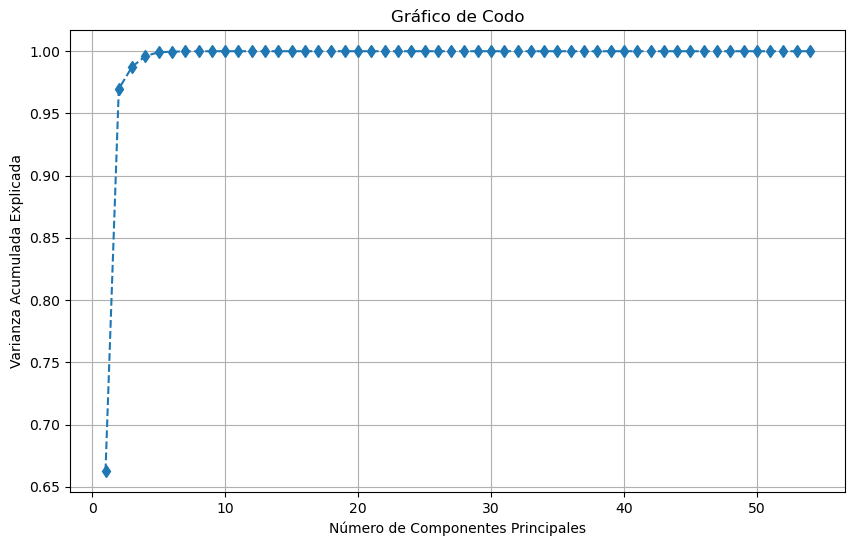

Número de Componentes Principales para explicar el 95% de la varianza: 2


In [45]:
#Usando la librería de Sklearn SIN ESCALAMIENTO
from sklearn.decomposition import PCA

#Con los valores escalados
pca = PCA()
X_pca_2 = pca.fit_transform(X)
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)
n_componentes = np.argmax(varianza_acumulada>=0.95)+1
plt.figure(figsize=(10,6))
margen_x = range(1, len(varianza_acumulada)+1)
plt.plot(margen_x, varianza_acumulada, marker="d", linestyle="--")
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Acumulada Explicada")
plt.title("Gráfico de Codo")
plt.grid()
plt.show()
print(f"Número de Componentes Principales para explicar el 95% de la varianza: {n_componentes}")

In [51]:
reduccion = PCA(n_components=3)
X_reducida_3 = reduccion.fit_transform(X)
print(np.shape(X_reducida_3))

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_reducida_3, y, test_size=0.2)

modelo = RandomForestClassifier()
modelo.fit(X_train_3,y_train_3)

(581012, 3)


RandomForestClassifier()

In [57]:
y_pred= modelo.predict(X_test_3)
exactitud = accuracy_score(y_test_3, y_pred)
print(f"La exactitud del modelo con PCA = 3 es: {exactitud}")

La exactitud del modelo con PCA = 3 es: 0.7745583160503602
